## This notebook will work on cleaning the FIFA 21 data scraped from sofifa.com
Dataset is available at Kaggle Website.
Link: https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring

Dataset is Cleaned by: Puyush Gupta

In [143]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
from sklearn import preprocessing
from datetime import datetime

# We may get low_memory warning because guessing dtypes for each column is very memory demanding. 
# Pandas tries to determine what dtype to set by analyzing the data in each column. 
# So, We use the following synttax while loading dataset:
data = pd.read_csv("fifa21_raw_data_v2.csv", encoding='UTF-8', low_memory=False) 
# We have used encoding='UTF-8' as there are may special characters present in data like in columns 'Name', 'LongName', So, to replace those
# accented characters with plain English alternatives. 

# Taking the copy of Dataframe
df = data.copy()

# Let's see the basic information of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

Extract information from Columns Descriptions File

In [144]:
content = []
with open('Fifa_Dataset_Dictionary.txt', 'r') as f:
    for line in f.readlines():
        content.append(line)
        
content = [i.strip('\n').split(': ') for i in content]

# Creating a Dictionary Format
content = {i[0]: i[1] for i in content} 

# Converting to dataframe
df2 = pd.DataFrame({'variable': content.keys(), 'description': content.values()}, index = np.arange(len(content)))

print(df2)
df2.to_csv('Column_Description_Fifa.csv', index=False)

            variable                                        description
0           photoUrl                     The URL of the player's photo.
1           LongName                       The full name of the player.
2          playerUrl        The URL of the player's page on sofifa.com.
3        Nationality                     The nationality of the player.
4          Positions                 The positions the player can play.
5               Name                      The short name of the player.
6                Age                             The age of the player.
7                OVA       The overall rating of the player in FIFA 21.
8                POT     The potential rating of the player in FIFA 21.
9    Team & Contract  The team the player is playing for in FIFA 21,...
10                ID              The unique identifier for the player.
11            Height       The height of the player in feet and inches.
12            Weight                The weight of the player in 

# Let's Start Cleaning Our Dataset

In [145]:
# To show each column with some defined row values to analysis better:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


# Let's Check for duplicate rows in dataset

In [146]:
# Here, .duplicated() Return boolean Series denoting duplicate rows.
print(df[df.duplicated()])

# As There are no duplicates of rows, we will move ahead.

Empty DataFrame
Columns: [ID, Name, LongName, photoUrl, playerUrl, Nationality, Age, ↓OVA, POT, Club, Contract, Positions, Height, Weight, Preferred Foot, BOV, Best Position, Joined, Loan Date End, Value, Wage, Release Clause, Attacking, Crossing, Finishing, Heading Accuracy, Short Passing, Volleys, Skill, Dribbling, Curve, FK Accuracy, Long Passing, Ball Control, Movement, Acceleration, Sprint Speed, Agility, Reactions, Balance, Power, Shot Power, Jumping, Stamina, Strength, Long Shots, Mentality, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Defending, Marking, Standing Tackle, Sliding Tackle, Goalkeeping, GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes, Total Stats, Base Stats, W/F, SM, A/W, D/W, IR, PAC, SHO, PAS, DRI, DEF, PHY, Hits]
Index: []


# Let's find those columns which contain NAN value

Loan Date End    17966
Hits              2595
dtype: int64


<Axes: >

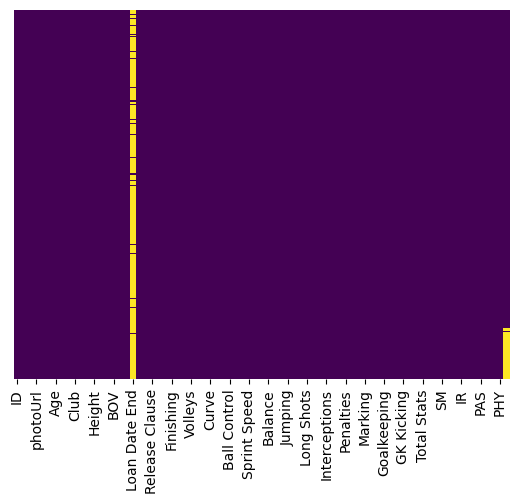

In [147]:
# To get number of nan values in each column of dataframe: 

# Method: 1
print(df.isnull().sum()[df.isnull().sum() > 0])
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

# Method: 2 
# print(df.isna().sum().sort_values(ascending=False))

# Handling Missing Values

1. For Column 'Loan Date End'

In [148]:
# By domain knowledge and some Observation, I get to know: 

# In sports, a loan involves a particular player being able to temporarily play for a club other than the one to which they are currently contracted.
# Loaned players are not under full time contract and that particular column was created for only players who's contractual agreement is a loan. 
# So, then it means that those players with empty details at the loan end date column are players on full contract.
# I replaced all empty cells under the Loan End Date column with 0(indicating they are not loaned players).

# Unique values of 'Loan Date End
print(df['Loan Date End'].unique())

# To get the sample of dataset where 'Loan Date End' is not NAN
df.loc[df['Loan Date End'].notnull()].head(3)

[nan 'Jun 30, 2021' 'Dec 31, 2020' 'Jan 30, 2021' 'Jun 30, 2022'
 'May 31, 2021' 'Jul 5, 2021' 'Dec 31, 2021' 'Jul 1, 2021' 'Jan 1, 2021'
 'Aug 31, 2021' 'Jan 31, 2021' 'Dec 30, 2021' 'Jun 23, 2021' 'Jan 3, 2021'
 'Nov 27, 2021' 'Jan 17, 2021' 'Jun 30, 2023' 'Jul 31, 2021'
 'Nov 22, 2020' 'May 31, 2022' 'Dec 30, 2020' 'Jan 4, 2021' 'Nov 30, 2020'
 'Aug 1, 2021']


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
205,173731,G. Bale,Gareth Bale,https://cdn.sofifa.com/players/173/731/21_60.png,http://sofifa.com/player/173731/gareth-bale/21...,Wales,30,83,83,\n\n\n\nTottenham Hotspur,"Jun 30, 2021 On Loan",RW,185cm,82kg,Left,83,RW,"Sep 1, 2013","Jun 30, 2021",€35M,€200K,€0,417,87,81,84,80,85,419,80,90,87,79,83,397,86,89,78,79,65,405,90,82,69,77,87,362,65,59,83,79,76,85,161,54,55,52,52,15,15,11,5,6,2213,465,3 ★,4★,Medium,Medium,4 ★,88,84,82,80,58,73,282
248,193105,A. Areola,Alphonse Areola,https://cdn.sofifa.com/players/193/105/21_60.png,http://sofifa.com/player/193105/alphonse-areol...,France,27,82,86,\n\n\n\nFulham,"Jun 30, 2021 On Loan",GK,195cm,94kg,Right,82,GK,"Jul 1, 2010","Jun 30, 2021",€32M,€71K,€0,117,20,19,14,48,16,103,12,16,16,37,22,305,56,54,58,79,58,264,60,72,38,80,14,142,26,23,17,51,25,64,43,13,18,12,406,85,79,80,78,84,1380,461,3 ★,1★,Medium,Medium,2 ★,85,79,80,84,55,78,94
254,200888,Danilo Pereira,Danilo Luís Hélio Pereira,https://cdn.sofifa.com/players/200/888/21_60.png,http://sofifa.com/player/200888/danilo-luis-he...,Portugal,28,82,82,\n\n\n\nParis Saint-Germain,"Jun 30, 2021 On Loan","CDM, CM",188cm,83kg,Right,82,CDM,"Jul 2, 2015","Jun 30, 2021",€27M,€20K,€0,329,58,57,76,83,55,340,75,54,53,80,78,323,63,68,57,75,60,377,74,62,84,89,68,363,82,81,71,72,57,84,234,83,83,68,58,9,7,13,14,15,2024,439,3 ★,3★,Medium,High,3 ★,66,63,72,73,80,85,285


# Strategy:
Our 'Loan Date End' is really similar to the 'Contract' column. So, We will be looking towards creating a new column which we will call the "Contract Expiry Year" as We already have 'Joined' column which contains information when a player joined the club.

This new column would consist of the End year in the Contract i.e. the year when the contract of player will be over. We would also be dropping 'Loan Date End' column afterwards since it is not really needed then. 

We will change the column name 'Contract' to 'Player Status', converting it to a categorical column. Also, to preserve the information, that which player is on Loan or not or are Free, We will replace values containing 'Free' in ''Player Status' column with 'Free'; values containing 'Loan' in 'Player Status' column with 'Loan' and values containing '~' in 'Player Status' column with 'Contract'.

In [149]:
# Creating the 2 columns 'Month' and 'Contract Expiry Year' from 'Loan Date End' Values
df[['Month','Contract Expiry Year']] = df['Loan Date End'].str.split(',', expand = True).apply(lambda x: x.str.strip())
# We are using .str as dtype of 'Loan Date End' is 'object' originally

# We keep the last 4 characters of each value from our 'Contract' column and use it to fill the NAN values in our 'Contract Expiry Year' 

expiry_yr = df['Contract'].apply(lambda x : x[-4:])
df['Contract Expiry Year'] = df['Contract Expiry Year'].fillna(expiry_yr)

# Now rename 'Contract' to a categorical column 'Player Status' for players with permanent Contract, Loan Contract and those who are Free
df.rename(columns = {'Contract': 'Player Status'}, inplace = True)

# Function create for column 'Player Status',
def status(val):
    # Assign 'Free' to Free players with no contract
    if 'Free' in val:
        return 'Free Agent'
    # Assign 'Loan' to Loan players with temporary club
    elif 'Loan' in val:
        return 'On Loan'
    # Assign 'Contract' to players with contract with parent club
    elif '~' in val:
        return 'Under Contract'
    
df['Player Status'] = df['Player Status'].apply(status)

# About categorical data:
# When your variable has only a few possible values (df[var].nunique() to work out the number of different possible values) it would be a good idea to set it as a categorical variable ---> df['var'].astype(category)
df['Player Status'] = df['Player Status'].astype('category')


print(df['Player Status'].unique())
print(df['Player Status'].isna().sum()) #As, it's 0, We are done.
df.head(3)

['Under Contract', 'On Loan', 'Free Agent']
Categories (3, object): ['Free Agent', 'On Loan', 'Under Contract']
0


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Player Status,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Month,Contract Expiry Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,Under Contract,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,NaN,2021
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,Under Contract,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,NaN,2022
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,Under Contract,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,NaN,2023


In [150]:
# Dropping Irrelevant Columns:

# Dropping 'Name' as We have 'LongName' Column already
# Dropping Photo_URl and Player_url are not accessible so it’s better to drop those columns.
drop_columns = ['Month', 'Loan Date End' , 'Name', 'photoUrl', 'playerUrl']
df.drop(columns = drop_columns, inplace=True)   

# Changing column name of 'LongName' to 'Full Name'
df.rename(columns = {'LongName': 'Full_Name'}, inplace = True)

2. For Column 'Hits'

In [151]:
# 'Hits' can be cleaned and transformed into integer (later converted to ordered categorical)
# Hits(means the number of times a player profile has been viewed)- we can set this to 0 meaning the player has no view. 
# We can also fill it with mean, it depends on situation.
print(df['Hits'].unique())

# To handle values like 1.6k etc.
def clean_hits(i):
    if i[-1] == 'K':
        i = i[:-1]
        i = float(i) * 1000
        i = int(i)
    else:
        i = int(i)
    return i


df['Hits'] = df['Hits'].fillna(0)
df['Hits'] = df['Hits'].astype(str).apply(clean_hits)

print(df['Hits'].isnull().sum())
# As, it's 0, We have handled all the nan-values and other too.

['771' '562' '150' '207' '595' '248' '246' '120' '1.6K' '130' '321' '189'
 '175' '96' '118' '216' '212' '154' '205' '202' '339' '408' '103' '332'
 '86' '173' '161' '396' '1.1K' '433' '242' '206' '177' '1.5K' '198' '459'
 '117' '119' '209' '84' '187' '165' '203' '65' '336' '126' '313' '124'
 '145' '538' '182' '101' '45' '377' '99' '194' '403' '414' '593' '374'
 '245' '3.2K' '266' '299' '309' '215' '265' '211' '112' '337' '70' '159'
 '688' '116' '63' '144' '123' '71' '224' '113' '168' '61' '89' '137' '278'
 '75' '148' '176' '197' '264' '214' '247' '402' '440' '1.7K' '2.3K' '171'
 '320' '657' '87' '259' '200' '255' '253' '196' '60' '97' '85' '169' '256'
 '132' '239' '166' '121' '109' '32' '46' '122' '48' '527' '199' '282' '51'
 '1.9K' '642' '155' '323' '288' '497' '509' '79' '49' '270' '511' '80'
 '128' '115' '156' '204' '143' '140' '152' '220' '134' '225' '94' '74'
 '135' '142' '50' '77' '40' '107' '193' '179' '34' '64' '453' '57' '81'
 '28' '78' '133' '43' '425' '88' '42' '36' '233' '37

# Appropriate Actions:

Some conclusions after observing the data columns:  
1. Rename '↓OVA' column to 'OVA'.
2. 'Club' needs some cleaning. Remove the leading '\n'.
3. 'Height' values could be transformed to 'meters' as it having some values in 'cm' and some in 'foot' and converting the dtype to float.
4. 'Weight' values could be transformed to 'kg' as it having some values in 'kg' and some in 'lbs' and converting the dtype to float.
5. Renaming 'Preferred Foot' to 'Foot', 'Best Position' to 'Position' and they definitely must be converted to categorical variables.
6. 'Joined' must be datetime dtype. 
7. 'Wage', 'Value' & 'Release Clause' can be converted to float. Remove euro sign and converting all values in scale of million.
8. 'A/W' and 'D/W' can be converted to ordered category and it has very few value.
9. 'W/F', 'SM' and 'IR' must be converted to integer and then to ordered category. Remove the star at end of each value.

1. For Column '↓OVA'

In [152]:
df.rename(columns = {'↓OVA':'OVA'}, inplace = True)

2. For Column 'Club'

In [153]:
# Method 1:
# The strip() function assists in removing character \n from the beginning or end of a string
df['Club'] = df['Club'].astype(str).apply(lambda x: x.strip('\n'))

# Method 2:
# data['Club'] = data['Club'].str.replace('\n\n\n\n', '')

df.head(2)

,ID,Full_Name,Nationality,Age,OVA,POT,Club,Player Status,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,Under Contract,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2021
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,Under Contract,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,2022


3. For Column 'Height'

In [154]:
print(df['Height'].unique())
# As, 1 inch = 2.54 cm and 1 foot = 12 inch and 1 foot = 30.48 cm

def convert_height(x):
    if x[-1] == "\"":
        x = x.replace('"', "") # or use x.replace("/"", "") 
        foot = int(x[0]) * 30.48
        inch = int(x[2:]) * 2.54
        return (foot+inch)/100
    elif x[-1] == "m":
        return int(x[:-2])/100

df.Height = df["Height"].apply(convert_height)

df.rename(columns = {'Height': 'Height(m)'}, inplace = True)

['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm' '199cm' '173cm' '168cm' '176cm' '177cm' '183cm' '180cm' '189cm'
 '179cm' '195cm' '172cm' '182cm' '186cm' '192cm' '165cm' '194cm' '167cm'
 '196cm' '163cm' '190cm' '174cm' '169cm' '171cm' '197cm' '200cm' '166cm'
 '6\'2"' '164cm' '198cm' '6\'3"' '6\'5"' '5\'11"' '6\'4"' '6\'1"' '6\'0"'
 '5\'10"' '5\'9"' '5\'6"' '5\'7"' '5\'4"' '201cm' '158cm' '162cm' '161cm'
 '160cm' '203cm' '157cm' '156cm' '202cm' '159cm' '206cm' '155cm']


4. For Column 'Weight'

In [155]:
print(df['Weight'].unique())

#As, 1 lbs = 0.453592 kg

def convert_weight(x):
    if x[-3:] == "lbs":
        return round(int(x[:-3])*0.4536, 2)
    elif x[-2:] == "kg":
        return int(x[:-2])
      
    
df.Weight = df["Weight"].apply(convert_weight)
df.rename(columns = {'Weight': 'Weight(Kg)'}, inplace = True)

['72kg' '83kg' '87kg' '70kg' '68kg' '80kg' '71kg' '91kg' '73kg' '85kg'
 '92kg' '69kg' '84kg' '96kg' '81kg' '82kg' '75kg' '86kg' '89kg' '74kg'
 '76kg' '64kg' '78kg' '90kg' '66kg' '60kg' '94kg' '79kg' '67kg' '65kg'
 '59kg' '61kg' '93kg' '88kg' '97kg' '77kg' '62kg' '63kg' '95kg' '100kg'
 '58kg' '183lbs' '179lbs' '172lbs' '196lbs' '176lbs' '185lbs' '170lbs'
 '203lbs' '168lbs' '161lbs' '146lbs' '130lbs' '190lbs' '174lbs' '148lbs'
 '165lbs' '159lbs' '192lbs' '181lbs' '139lbs' '154lbs' '157lbs' '163lbs'
 '98kg' '103kg' '99kg' '102kg' '56kg' '101kg' '57kg' '55kg' '104kg'
 '107kg' '110kg' '53kg' '50kg' '54kg' '52kg']


5. For Columns 'Preferred Foot' and 'Best Position'

In [156]:
# For 'Preferred Foot':
print(df['Preferred Foot'].unique())

# Foot must be converted to Categorical
df['Preferred Foot'] = df['Preferred Foot'].astype('category')

print(df.dtypes['Preferred Foot'])


# For 'Best Position':
print(df['Best Position'].unique())

# Position must be converted to Categorical
df['Best Position'] = df['Best Position'].astype('category')

print(df.dtypes['Best Position'])

['Left' 'Right']
category
['RW' 'ST' 'GK' 'CAM' 'LW' 'CB' 'CDM' 'CF' 'CM' 'RB' 'LB' 'LM' 'RM' 'LWB'
 'RWB']
category


6. For Column 'Joined'

In [157]:
# We have to convert the date to yyyy/mm/dd format which is in a datetime format
print(df['Joined'].unique())
print(df['Joined'].dtype)

joined = df.Joined

print(pd.to_datetime(joined))

print(pd.to_datetime(joined).isna().sum())   # As, it return 0, So, Everything is good, so let's assign the value

df.Joined = pd.to_datetime(joined)

df.head(2)

['Jul 1, 2004' 'Jul 10, 2018' 'Jul 16, 2014' ... 'Sep 22, 2018'
 'Feb 28, 2015' 'Mar 6, 2018']
object
0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
5       2014-07-01
6       2017-07-01
7       2018-07-19
8       2018-07-01
9       2014-07-01
10      2018-01-01
11      2016-07-01
12      2013-07-11
13      2018-08-09
14      2011-07-01
15      2009-07-09
16      2005-08-01
17      2011-07-28
18      2015-07-14
19      2016-07-16
20      2015-07-01
21      2015-07-01
22      2017-07-01
23      2010-07-01
24      2012-07-01
25      2014-07-01
26      2019-07-01
27      2014-07-17
28      2019-07-12
29      2017-08-31
30      2015-10-07
31      2017-07-01
32      2017-07-21
33      2018-01-30
34      2020-01-30
35      2018-07-01
36      2015-08-28
37      2015-07-06
38      2019-09-02
39      2005-07-01
40      2008-09-01
41      2018-01-31
42      2017-07-19
43      2015-08-06
44      2012-08-01
45      2020-09-25
46      2012-08-31
47   

,ID,Full_Name,Nationality,Age,OVA,POT,Club,Player Status,Positions,Height(m),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,Under Contract,"RW, ST, CF",1.70,72.0,Left,93,RW,2004-07-01,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2021
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,Under Contract,"ST, LW",1.87,83.0,Right,92,ST,2018-07-10,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,2022


7. For Columns 'Wage', 'Value' and 'Release Clause'

In [158]:
# print(df['Wage'].unique())
print(df['Wage'].dtype)

# print(df['Value'].unique())
print(df['Value'].dtype)

# print(df['Release Clause'].unique())
print(df['Release Clause'].dtype)

value = df.Value
wage = df.Wage
release_clause = df['Release Clause']

# Let's check if all the values are in Euro

print(value.str[0].unique())
print(wage.str[0].unique())
print(release_clause.str[0].unique())

# Let's check if all the values are in Million/Thousand

print(value.str[-1].unique())
print(wage.str[-1].unique())
print(release_clause.str[-1].unique())

object
object
object
['€']
['€']
['€']
['M' '0' 'K']
['K' '0']
['M' '0' 'K']


In [159]:
def convert(i):
    if 'M' in i:
        value = float(i[:-1])*1000000
        return value
    elif i[-1] == 'K':
        value = float(i[:-1])*1000
        return value
    else:
        value = float(i)
        return value


# Removing Euro Signs
value = value.str[1:]
wage = wage.str[1:]
release_clause = release_clause.str[1:]

value = value.apply(convert)
wage = wage.apply(convert)
release_clause = release_clause.apply(convert)

df.Value = value
df.Wage = wage
df['Release Clause'] = release_clause

df['Value'] = df['Value'].astype(float)
df['Wage'] = df['Wage'].astype(float)
df['Release Clause'] = df['Release Clause'].astype(float)

df.rename(columns = {'Value' : 'Value(Euro)','Wage': 'Wage(Euro)','Release Clause': 'Release Clause(Euro)'},inplace='True')

8. For Columns 'A/W' and 'D/W'

In [160]:
print(df['A/W'].unique())

print(df['D/W'].unique())

df['A/W'] = df['A/W'].astype('category')
df['D/W'] = df['D/W'].astype('category')

df['A/W'] = df['A/W'].cat.set_categories(['Low', 'Medium', 'High'], ordered=True)
df['D/W'] = df['D/W'].cat.set_categories(['Low', 'Medium', 'High'], ordered=True)

['Medium' 'High' 'Low']
['Low' 'Medium' 'High']


9. For Columns 'W/F', 'SM' and 'IR'

In [161]:
print(df['W/F'].dtype)
print(df['W/F'].unique())

print(df['SM'].dtype)
print(df['SM'].unique())


print(df['IR'].dtype)
print(df['IR'].unique())

def remove_star(i):
    return int(i[0])


df['W/F'] = df['W/F'].apply(remove_star)
df['SM'] = df['SM'].apply(remove_star)
df['IR'] = df['IR'].apply(remove_star)

df['W/F'] = df['W/F'].astype('category')
df['SM'] = df['SM'].astype('category')
df['IR'] = df['IR'].astype('category')

# You can convert an unordered categorical type column to an ordered categorical column.
df['W/F'] = df['W/F'].cat.set_categories([1,2,3,4,5], ordered=True)
df['SM'] = df['SM'].cat.set_categories([1,2,3,4,5], ordered=True)
df['IR'] = df['IR'].cat.set_categories([1,2,3,4,5], ordered=True)

df = df.rename(columns={'W/F':'W/F(★)','SM':'SM(★)','IR':'IR(★)'})

object
['4 ★' '3 ★' '5 ★' '2 ★' '1 ★']
object
['4★' '5★' '1★' '2★' '3★']
object
['5 ★' '3 ★' '4 ★' '2 ★' '1 ★']


In [162]:
df.sample(5)

,ID,Full_Name,Nationality,Age,OVA,POT,Club,Player Status,Positions,Height(m),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(Euro),Wage(Euro),Release Clause(Euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
311,215330,Joaquín Correa,Argentina,25,81,84,Lazio,Under Contract,"CF, ST, CAM",1.88,77.0,Right,83,CAM,2018-08-01,34500000.0,73000.0,39900000.0,375,74,77,68,81,75,392,88,81,63,74,86,398,81,86,84,80,67,363,79,63,76,74,71,298,48,36,79,78,57,73,102,39,37,26,44,11,10,7,8,8,1972,430,4,4,High,Medium,1,84,75,77,86,39,69,243,2024
6307,238069,Gabriel Carrasco,Argentina,23,69,79,Godoy Cruz,On Loan,"CB, RB",1.75,74.0,Right,71,CB,2017-03-12,2900000.0,7000.0,0.0,281,65,47,67,61,41,279,65,47,41,59,67,342,74,75,70,59,64,344,59,87,78,71,49,301,73,75,55,51,47,67,200,62,67,71,40,12,6,7,8,7,1787,391,3,2,Medium,Medium,1,75,50,58,66,68,74,11,2020
10289,53655,Jay Bothroyd,England,38,65,65,Hokkaido Consadole Sapporo,Under Contract,ST,1.90,89.0,Left,65,ST,2017-07-01,240000.0,2000.0,238000.0,332,61,68,76,65,62,313,63,61,69,51,69,176,29,30,31,55,31,307,72,51,31,92,61,279,67,19,70,58,65,72,71,28,21,22,68,16,10,15,11,16,1546,316,2,3,High,Low,2,30,67,61,60,28,70,8,2021
7013,212912,Ji Soo Park,Korea Republic,26,68,73,Guangzhou Evergrande Taobao FC,Under Contract,"CB, LB",1.88,70.0,Right,70,CB,2019-02-20,1600000.0,9000.0,1800000.0,252,38,48,69,70,27,238,57,32,28,63,58,338,68,69,74,65,62,329,54,75,72,70,58,275,65,66,46,60,38,56,206,70,68,68,54,11,11,9,14,9,1692,374,3,3,Medium,Medium,1,69,50,57,60,68,70,8,2022
13881,236783,Kasper Lunding,Denmark,20,62,72,Heracles Almelo,Under Contract,RM,1.78,69.0,Left,63,CAM,2020-10-05,875000.0,1000.0,825000.0,245,56,56,37,58,38,280,64,66,36,49,65,350,72,69,71,58,80,284,53,79,59,39,54,222,44,27,59,58,34,57,89,25,28,36,58,11,8,11,13,15,1528,321,3,3,Medium,Medium,1,70,53,56,66,29,47,2,2024


# Note that:

Attacking = sum(Crossing, Finishing, Heading Accuracy, Short Passing, Volleys)

Skill = sum(Dribbling, Curve, FK Accuracy, Long Passing, Ball Control) 

Movement = sum(Acceleration, Sprint Speed, Agility, Reactions, Balance)

Power = sum(Shot Power, Jumping, Stamina, Strength, Long Shots)

Mentality = sum(Agression, Interceptions, Positioning, Vision, Penalties, Composure)

Defending = sum(Marking, Standing Tackle, Sliding Tackle)

GoalKeeping = sum(GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes)

Total stats = sum(Attacking, Skill, Movement, Power, Mentality, Defending, GoalKeeping)

Base Stats = sum (Pace, Shooting, Passing, Dribbling, Defending, and Physicality. ie. (PAC,	SHO, PAS, DRI, DEF, PHY	))


# Here, 'Composure' is not added to 'Mentality' and 'Totat Stats'. 

In [163]:
# Let's add Composure to 'Mentality' and 'Total Stats' columns.

df['Mentality'] = df['Mentality'] + df['Composure']
df['Total Stats'] = df['Total Stats'] + df['Composure']

In [164]:
df.head(5)

,ID,Full_Name,Nationality,Age,OVA,POT,Club,Player Status,Positions,Height(m),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(Euro),Wage(Euro),Release Clause(Euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,Under Contract,"RW, ST, CF",1.70,72.0,Left,93,RW,2004-07-01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,443,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2327,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2021
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,Under Contract,"ST, LW",1.87,83.0,Right,92,ST,2018-07-10,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,448,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2316,464,4,5,High,Low,5,89,93,81,89,35,77,562,2022
2,200389,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,Under Contract,GK,1.88,87.0,Right,91,GK,2014-07-16,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,208,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1481,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2023
3,192985,Kevin De Bruyne,Belgium,29,91,91,Manchester City,Under Contract,"CAM, CM",1.81,70.0,Right,91,CAM,2015-08-30,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,499,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2395,485,5,4,High,High,4,76,86,93,88,64,78,207,2023
4,190871,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,Under Contract,"LW, CAM",1.75,68.0,Right,91,LW,2017-08-03,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,449,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2268,451,5,5,High,Medium,5,91,85,86,94,36,59,595,2022


We want to get the percentage value for each row of the summed columns. This will be achieved by dividing each row of the summed column by it's highest possible value and multiplying by 100. The summed up columns are: Attacking, Skills, Movement, Power, Mentality, Defending and Goalkeeping

1. Attacking

In [165]:
df['Attacking(%)'] = df['Attacking'].apply(lambda x: round((x / 500) * 100), 2)

2. Skills

In [166]:
df['Skill(%)'] = df['Skill'].apply(lambda x: round((x / 500) * 100), 2)

3. Movement

In [167]:
df['Movement(%)'] = df['Movement'].apply(lambda x: round((x/500) * 100), 2)

4. Power

In [168]:
df['Power(%)'] = df['Power'].apply(lambda x: round((x/500) * 100), 2)

5. Mentality

In [169]:
df['Mentality(%)'] = df['Mentality'].apply(lambda x: round((x/600) * 100), 2)

6. Defending

In [170]:
df['Defending(%)'] = df['Defending'].apply(lambda x: round((x/300) * 100), 2)

7. GoalKeeping

In [171]:
df['GoalKeeping(%)'] = df['Goalkeeping'].apply(lambda x: round((x/500) * 100), 2)

Drop the replaced columns

In [172]:
df.drop(['Attacking','Skill','Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping' ], axis = 1, inplace = True)


df.head(5)

,ID,Full_Name,Nationality,Age,OVA,POT,Club,Player Status,Positions,Height(m),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(Euro),Wage(Euro),Release Clause(Euro),Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year,Attacking(%),Skill(%),Movement(%),Power(%),Mentality(%),Defending(%),GoalKeeping(%)
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,Under Contract,"RW, ST, CF",1.70,72.0,Left,93,RW,2004-07-01,103500000.0,560000.0,138400000.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,2327,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2021,86,94,90,78,74,30,11
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,Under Contract,"ST, LW",1.87,83.0,Right,92,ST,2018-07-10,63000000.0,220000.0,75900000.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,2316,464,4,5,High,Low,5,89,93,81,89,35,77,562,2022,87,83,86,89,75,28,12
2,200389,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,Under Contract,GK,1.88,87.0,Right,91,GK,2014-07-16,120000000.0,125000.0,159400000.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,90,1481,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2023,19,22,61,54,35,19,87
3,192985,Kevin De Bruyne,Belgium,29,91,91,Manchester City,Under Contract,"CAM, CM",1.81,70.0,Right,91,CAM,2015-08-30,129000000.0,370000.0,161000000.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,68,65,53,15,13,5,10,13,2395,485,5,4,High,High,4,76,86,93,88,64,78,207,2023,81,88,80,82,83,62,11
4,190871,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,Under Contract,"LW, CAM",1.75,68.0,Right,91,LW,2017-08-03,132000000.0,270000.0,166500000.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,35,30,29,9,9,15,15,11,2268,451,5,5,High,Medium,5,91,85,86,94,36,59,595,2022,82,90,91,71,75,31,12


# Outliers:
Outlier is an observation that is numerically distant from the rest of the data i.e a data point that is far away from the average.
It reduces the power of statistical tests. Machine learning algorithms do not work well in the presence of outlier. So, it is desirable to detect and remove outliers.
Deleting the outliers values is not a good idea when we have small dataset.

In this FIFA 21 dataset, We would be lookin at the outliers in the columns of Age, Height and Weight.

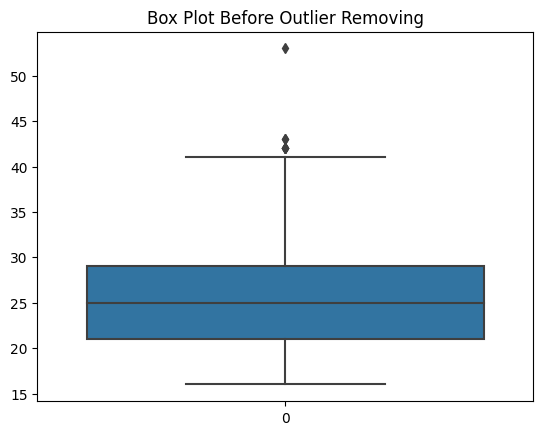

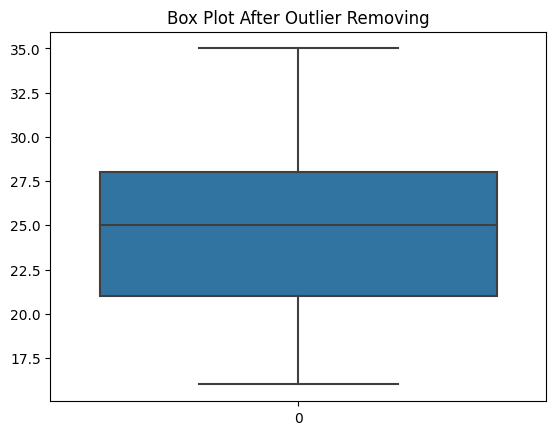

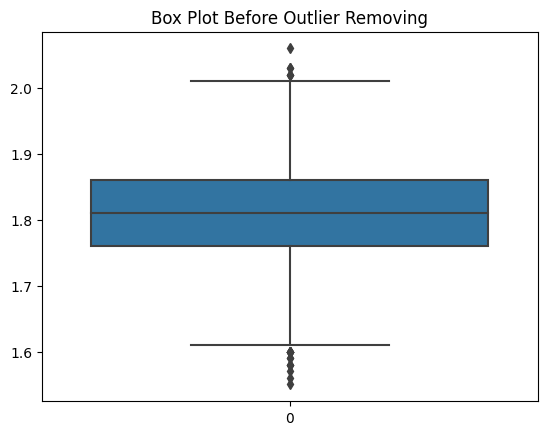

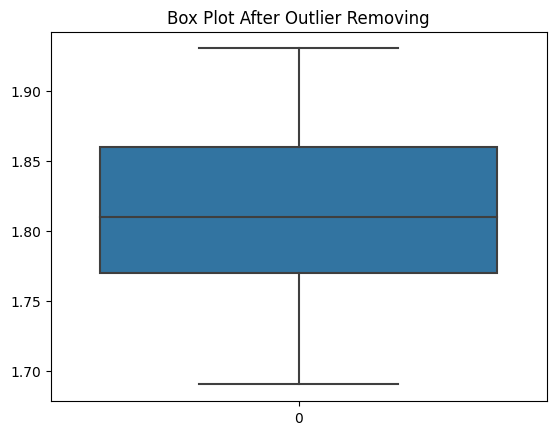

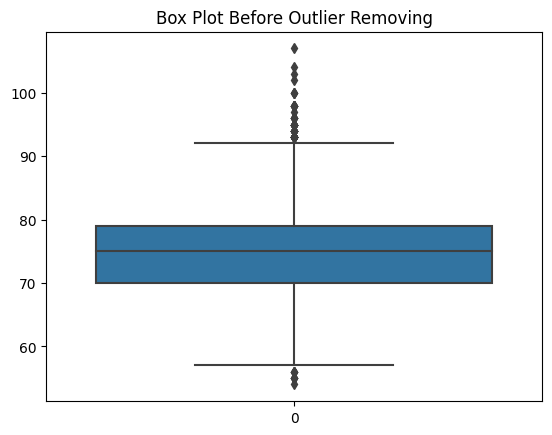

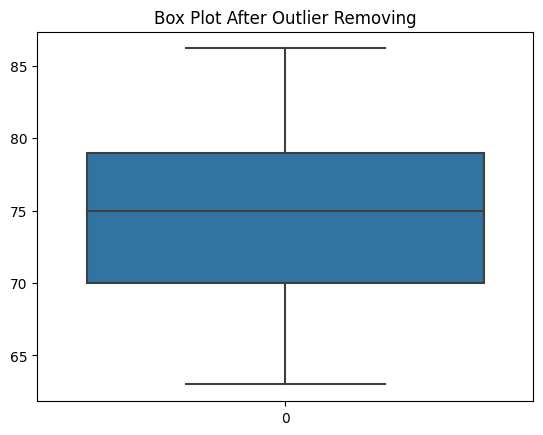

In [173]:
def drop_outliers(df, field_name):
    iqr = 1.5*(df[field_name].quantile(0.50) - df[field_name].quantile(0.25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
    
sns.boxplot(df['Age'])
plt.title("Box Plot Before Outlier Removing")
plt.show()
drop_outliers(df, 'Age')
sns.boxplot(df['Age'])
plt.title("Box Plot After Outlier Removing")
plt.show()

sns.boxplot(df['Height(m)'])
plt.title("Box Plot Before Outlier Removing")
plt.show()
drop_outliers(df, 'Height(m)')
sns.boxplot(df['Height(m)'])
plt.title("Box Plot After Outlier Removing")
plt.show()

sns.boxplot(df['Weight(Kg)'])
plt.title("Box Plot Before Outlier Removing")
plt.show()
drop_outliers(df, 'Weight(Kg)')
sns.boxplot(df['Weight(Kg)'])
plt.title("Box Plot After Outlier Removing")
plt.show()


In [175]:
# New Dimension of Cleaned Dataset
df.shape

(16407, 74)

In [174]:
# Let's Save Our Clean Dataframe into a new csv file
df.to_csv('FIFA21_Cleaned_Dataset.csv', index= False)

# Thank You